In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# image = cv2.imread('test_image.jpg')
image = cv2.imread('../../data/t2/0.jpg')

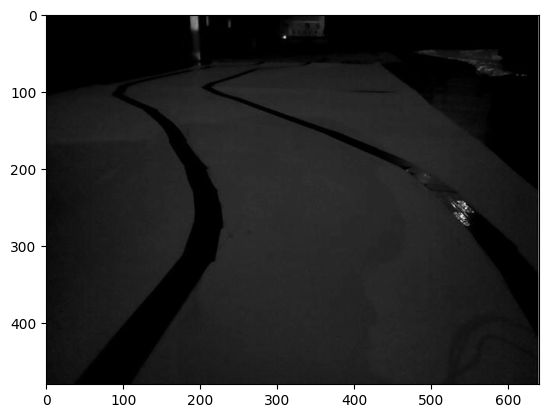

In [4]:
# convert to grayscale
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray');

In [5]:
# reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

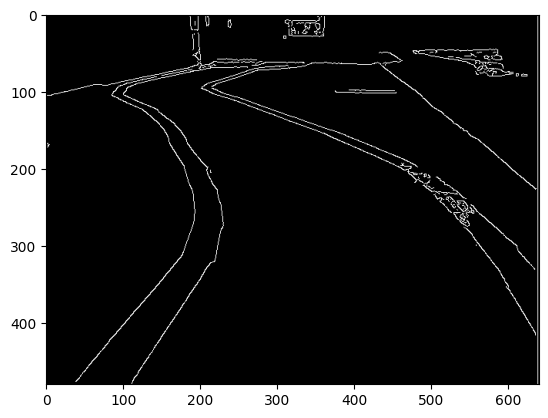

In [6]:
# canny edge detection

# canny = cv2.Canny(blur, 50, 150)
canny = cv2.Canny(blur, 10, 30)
plt.imshow(canny, cmap='gray');

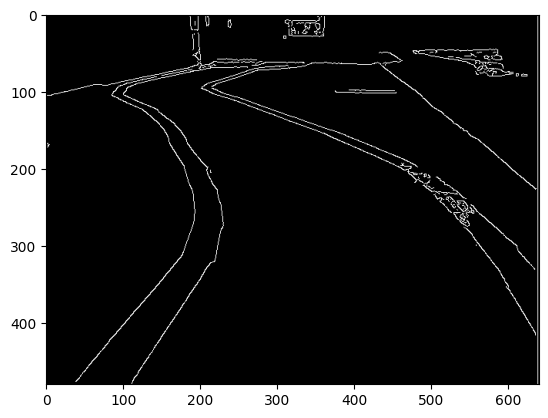

In [7]:
# wrap canny into function
def canny(image, t1=50, t2=150):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, t1, t2)
    return canny


plt.imshow(canny(image, 10, 30), cmap='gray');
# plt.imshow(canny(image), cmap='gray');

In [8]:
# hough transforming
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)

    return line_image


# lines = cv2.HoughLinesP(canny(image), 2, np.pi / 180, 100, np.array([]), minLineLength=40, maxLineGap=5)
lines = cv2.HoughLinesP(canny(image), 2,  np.pi / 180, 50, np.array([]), minLineLength=2, maxLineGap=15)
line_image = display_lines(image, lines)

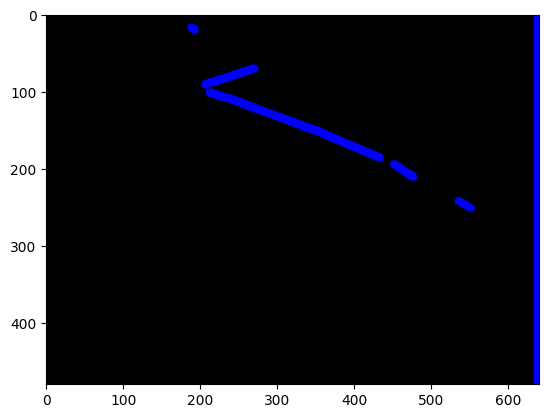

In [9]:
plt.imshow(line_image)

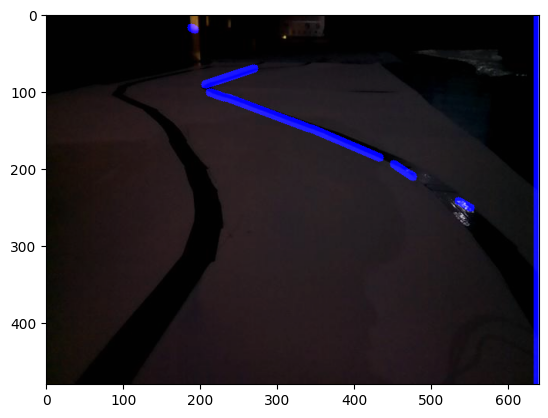

In [10]:
# blend lines to original
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
plt.imshow(combo_image);

In [11]:
# general
def process_image(image):
    lines = cv2.HoughLinesP(canny(image), 2,  np.pi / 180, 50, np.array([]), minLineLength=2, maxLineGap=15)
    line_image = display_lines(image, lines)
    combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    return combo_image

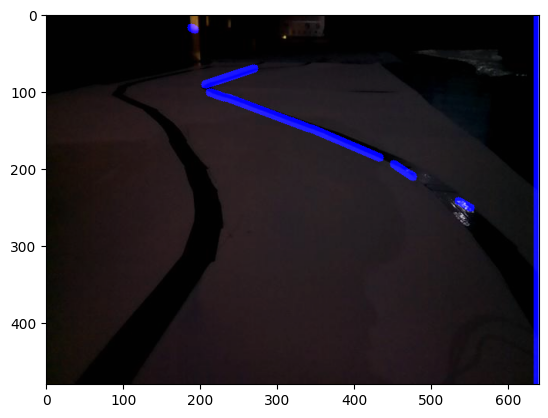

In [12]:
plt.imshow(process_image(image));

In [13]:
image.shape

(480, 640, 3)

In [14]:
import cv2
cap = cv2.VideoCapture('../../data/t3/out.mp4')
count = 0
while cap.isOpened():
    ret,frame = cap.read()
    frame = process_image(frame)
    cv2.imshow('window-name', frame)
    count = count + 1
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() # destroy all opened windows

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
